In [1]:
# multivariate output multi-step 1d cnn example
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [3]:
dataset = pd.read_csv('bor3hci.csv', header=0, index_col=0)
#dataset=dataset.del((:,0))
dataset=dataset.fillna(0)
dataset = dataset.drop((c for c in dataset.columns[-1:]), axis=1)
values = dataset.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# choose a number of time steps
n_steps_in, n_steps_out = 12, 3
# convert into input/output
X_train, y_train = split_sequences(scaled[:-12,:], n_steps_in, n_steps_out)
# flatten output
n_output = y_train.shape[1] * y_train.shape[2]
y_train = y_train.reshape((y_train.shape[0], n_output))
# the dataset knows the number of features, e.g. 2
n_features = X_train.shape[2]
test = scaled[-39:,:]
X_test, y_test = split_sequences(test, n_steps_in, n_steps_out)
#X_test=scaled[-15:-3,:]
#y_test=scaled[-3:,:]
#X_test = X_test.reshape((1, n_steps_in, n_features))
#y_test = y_test.reshape((1, n_steps_out, n_features))
#y_test = y_test.reshape((y_test.shape[0], n_output))
#X_test=scaled[-15:-3,:]
#y_test=scaled[-3:,:]
X_train = X_train.reshape((X_train.shape[0],1,n_steps_in,n_features))
X_test = X_test.reshape((25,1,n_steps_in,n_features))
y_test = y_test.reshape((25, n_steps_out, n_features))
y_test = y_test.reshape((y_test.shape[0], n_output))

In [4]:
#print(X_train.shape)
#print(X_test.shape)

Train on 246 samples, validate on 25 samples
Epoch 1/500
 - 6s - loss: 0.4677 - val_loss: 0.4353
Epoch 2/500
 - 0s - loss: 0.4562 - val_loss: 0.4259
Epoch 3/500
 - 0s - loss: 0.4425 - val_loss: 0.4143
Epoch 4/500
 - 0s - loss: 0.4250 - val_loss: 0.3994
Epoch 5/500
 - 0s - loss: 0.4023 - val_loss: 0.3800
Epoch 6/500
 - 0s - loss: 0.3735 - val_loss: 0.3584
Epoch 7/500
 - 0s - loss: 0.3423 - val_loss: 0.3431
Epoch 8/500
 - 0s - loss: 0.3135 - val_loss: 0.3294
Epoch 9/500
 - 0s - loss: 0.2878 - val_loss: 0.3170
Epoch 10/500
 - 0s - loss: 0.2676 - val_loss: 0.3070
Epoch 11/500
 - 0s - loss: 0.2553 - val_loss: 0.2997
Epoch 12/500
 - 0s - loss: 0.2466 - val_loss: 0.2942
Epoch 13/500
 - 0s - loss: 0.2413 - val_loss: 0.2917
Epoch 14/500
 - 0s - loss: 0.2372 - val_loss: 0.2916
Epoch 15/500
 - 0s - loss: 0.2334 - val_loss: 0.2928
Epoch 16/500
 - 0s - loss: 0.2300 - val_loss: 0.2936
Epoch 17/500
 - 0s - loss: 0.2266 - val_loss: 0.2942
Epoch 18/500
 - 0s - loss: 0.2237 - val_loss: 0.2950
Epoch 19/5

Epoch 154/500
 - 0s - loss: 0.1660 - val_loss: 0.2011
Epoch 155/500
 - 0s - loss: 0.1658 - val_loss: 0.2009
Epoch 156/500
 - 0s - loss: 0.1658 - val_loss: 0.2007
Epoch 157/500
 - 0s - loss: 0.1658 - val_loss: 0.2008
Epoch 158/500
 - 0s - loss: 0.1657 - val_loss: 0.2008
Epoch 159/500
 - 0s - loss: 0.1656 - val_loss: 0.2005
Epoch 160/500
 - 0s - loss: 0.1656 - val_loss: 0.2006
Epoch 161/500
 - 0s - loss: 0.1656 - val_loss: 0.2005
Epoch 162/500
 - 0s - loss: 0.1654 - val_loss: 0.2003
Epoch 163/500
 - 0s - loss: 0.1655 - val_loss: 0.2004
Epoch 164/500
 - 0s - loss: 0.1653 - val_loss: 0.2002
Epoch 165/500
 - 0s - loss: 0.1652 - val_loss: 0.2001
Epoch 166/500
 - 0s - loss: 0.1651 - val_loss: 0.1999
Epoch 167/500
 - 0s - loss: 0.1652 - val_loss: 0.2000
Epoch 168/500
 - 0s - loss: 0.1651 - val_loss: 0.2000
Epoch 169/500
 - 0s - loss: 0.1649 - val_loss: 0.1997
Epoch 170/500
 - 0s - loss: 0.1649 - val_loss: 0.1998
Epoch 171/500
 - 0s - loss: 0.1648 - val_loss: 0.1997
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.1472 - val_loss: 0.1888
Epoch 307/500
 - 0s - loss: 0.1471 - val_loss: 0.1884
Epoch 308/500
 - 0s - loss: 0.1470 - val_loss: 0.1888
Epoch 309/500
 - 0s - loss: 0.1469 - val_loss: 0.1882
Epoch 310/500
 - 0s - loss: 0.1468 - val_loss: 0.1887
Epoch 311/500
 - 0s - loss: 0.1466 - val_loss: 0.1881
Epoch 312/500
 - 0s - loss: 0.1466 - val_loss: 0.1886
Epoch 313/500
 - 0s - loss: 0.1464 - val_loss: 0.1881
Epoch 314/500
 - 0s - loss: 0.1463 - val_loss: 0.1881
Epoch 315/500
 - 0s - loss: 0.1462 - val_loss: 0.1884
Epoch 316/500
 - 0s - loss: 0.1460 - val_loss: 0.1882
Epoch 317/500
 - 0s - loss: 0.1460 - val_loss: 0.1880
Epoch 318/500
 - 0s - loss: 0.1459 - val_loss: 0.1884
Epoch 319/500
 - 0s - loss: 0.1457 - val_loss: 0.1882
Epoch 320/500
 - 0s - loss: 0.1455 - val_loss: 0.1877
Epoch 321/500
 - 0s - loss: 0.1455 - val_loss: 0.1878
Epoch 322/500
 - 0s - loss: 0.1454 - val_loss: 0.1880
Epoch 323/500
 - 0s - loss: 0.1452 - val_loss: 0.1877
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.1358 - val_loss: 0.1809
Epoch 459/500
 - 0s - loss: 0.1360 - val_loss: 0.1835
Epoch 460/500
 - 0s - loss: 0.1362 - val_loss: 0.1802
Epoch 461/500
 - 0s - loss: 0.1364 - val_loss: 0.1809
Epoch 462/500
 - 0s - loss: 0.1362 - val_loss: 0.1840
Epoch 463/500
 - 0s - loss: 0.1371 - val_loss: 0.1781
Epoch 464/500
 - 0s - loss: 0.1388 - val_loss: 0.1851
Epoch 465/500
 - 0s - loss: 0.1377 - val_loss: 0.1780
Epoch 466/500
 - 0s - loss: 0.1367 - val_loss: 0.1845
Epoch 467/500
 - 0s - loss: 0.1367 - val_loss: 0.1782
Epoch 468/500
 - 0s - loss: 0.1371 - val_loss: 0.1854
Epoch 469/500
 - 0s - loss: 0.1371 - val_loss: 0.1771
Epoch 470/500
 - 0s - loss: 0.1381 - val_loss: 0.1863
Epoch 471/500
 - 0s - loss: 0.1383 - val_loss: 0.1763
Epoch 472/500
 - 0s - loss: 0.1393 - val_loss: 0.1904
Epoch 473/500
 - 0s - loss: 0.1404 - val_loss: 0.1758
Epoch 474/500
 - 0s - loss: 0.1416 - val_loss: 0.1925
Epoch 475/500
 - 0s - loss: 0.1413 - val_loss: 0.1759
Epoch 476/500
 - 0s - loss: 

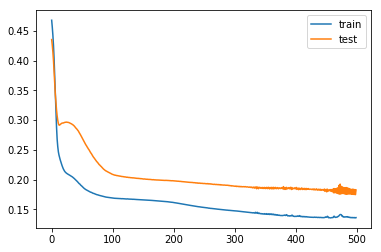

In [5]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=32, kernel_size=10, activation='relu',input_shape=(n_steps_in, n_features))))
model.add(TimeDistributed(MaxPooling1D(pool_size=3)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='softmax', input_shape=(n_steps_in, n_features)))
model.add(Dense(60,activation='relu'))
model.add(Dense(n_output,activation='relu'))
model.compile(optimizer='adam', loss='mae')
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test, y_test),verbose=2,shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [6]:
yhat = model.predict(X_test)
n_yhat = yhat.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_yhat = scaler.inverse_transform(n_yhat)
inv_yhat = inv_yhat[:,4:7]
y_test = y_test.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_y = scaler.inverse_transform(y_test)
inv_y = inv_y[:,4:7]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 327.694


In [7]:
i=0
ninhat=[]
x_input = scaled[-12:,:]
x_input = x_input.reshape((1,1, n_steps_in, n_features))
nx_input = x_input
while i < 8:
    nyhat = model.predict(nx_input)
    #print(nyhat)
    nx_input = nx_input.reshape((n_steps_in, n_features))
    nyhat = nyhat.reshape((n_steps_out, n_features))
    nx_input = np.append(nx_input[3:,:],nyhat)
    nx_input = nx_input.reshape((1,1, n_steps_in, n_features))
    ninhat = np.append(ninhat,nyhat)
    i = i+1

In [8]:
dataset.head()

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
Date,,,,,,,,
01/05/92,900.0,14,25.8,135.348837,411.258980,0.0,329.108527,0.0
01/06/92,750.0,14,29.9,150.735786,450.024963,0.0,334.949833,0.0
01/07/92,750.0,14,30.2,149.602649,451.258490,0.0,331.523179,0.0
01/08/92,1500.0,21,31.0,323.709677,398.736441,0.0,811.838710,0.0
01/09/92,1475.0,21,26.0,294.423077,404.641083,0.0,727.615385,0.0


In [9]:
print(nx_input.shape)
print(nyhat.shape)
print(ninhat.shape)

(1, 1, 12, 8)
(3, 8)
(192,)


In [10]:
ninhat = ninhat.reshape((24, n_features))
ninhat = scaler.inverse_transform(ninhat)
print(ninhat.shape)

(24, 8)


In [11]:
print(ninhat[:,4:7])

[[3.29556322e+02 3.00178203e-01 6.07922316e+02]
 [2.67445056e+02 2.90292440e-01 6.15342258e+02]
 [2.53535378e+02 2.39552296e-01 6.08790044e+02]
 [2.05075876e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.59337992e+01]
 [0.00000000e+00 0.00000000e+00 9.30803190e+01]
 [0.00000000e+00 0.00000000e+00 8.73107678e+01]
 [8.80906639e+01 0.00000000e+00 4.42361980e+02]
 [0.00000000e+00 0.00000000e+00 4.36020011e+02]
 [0.00000000e+00 0.00000000e+00 4.04986179e+02]
 [1.60630469e+02 0.00000000e+00 6.66527677e+02]
 [9.53202728e+01 0.00000000e+00 6.57810579e+02]
 [7.55224802e+01 0.00000000e+00 6.11022085e+02]
 [2.66087566e+02 6.02563691e-02 9.81652590e+02]
 [2.38303527e+02 5.01969159e-02 9.73070859e+02]
 [2.18384709e+02 1.81519561e-02 9.081342

In [12]:
#print(nx_input[0,2] ,nx_input[0,5])

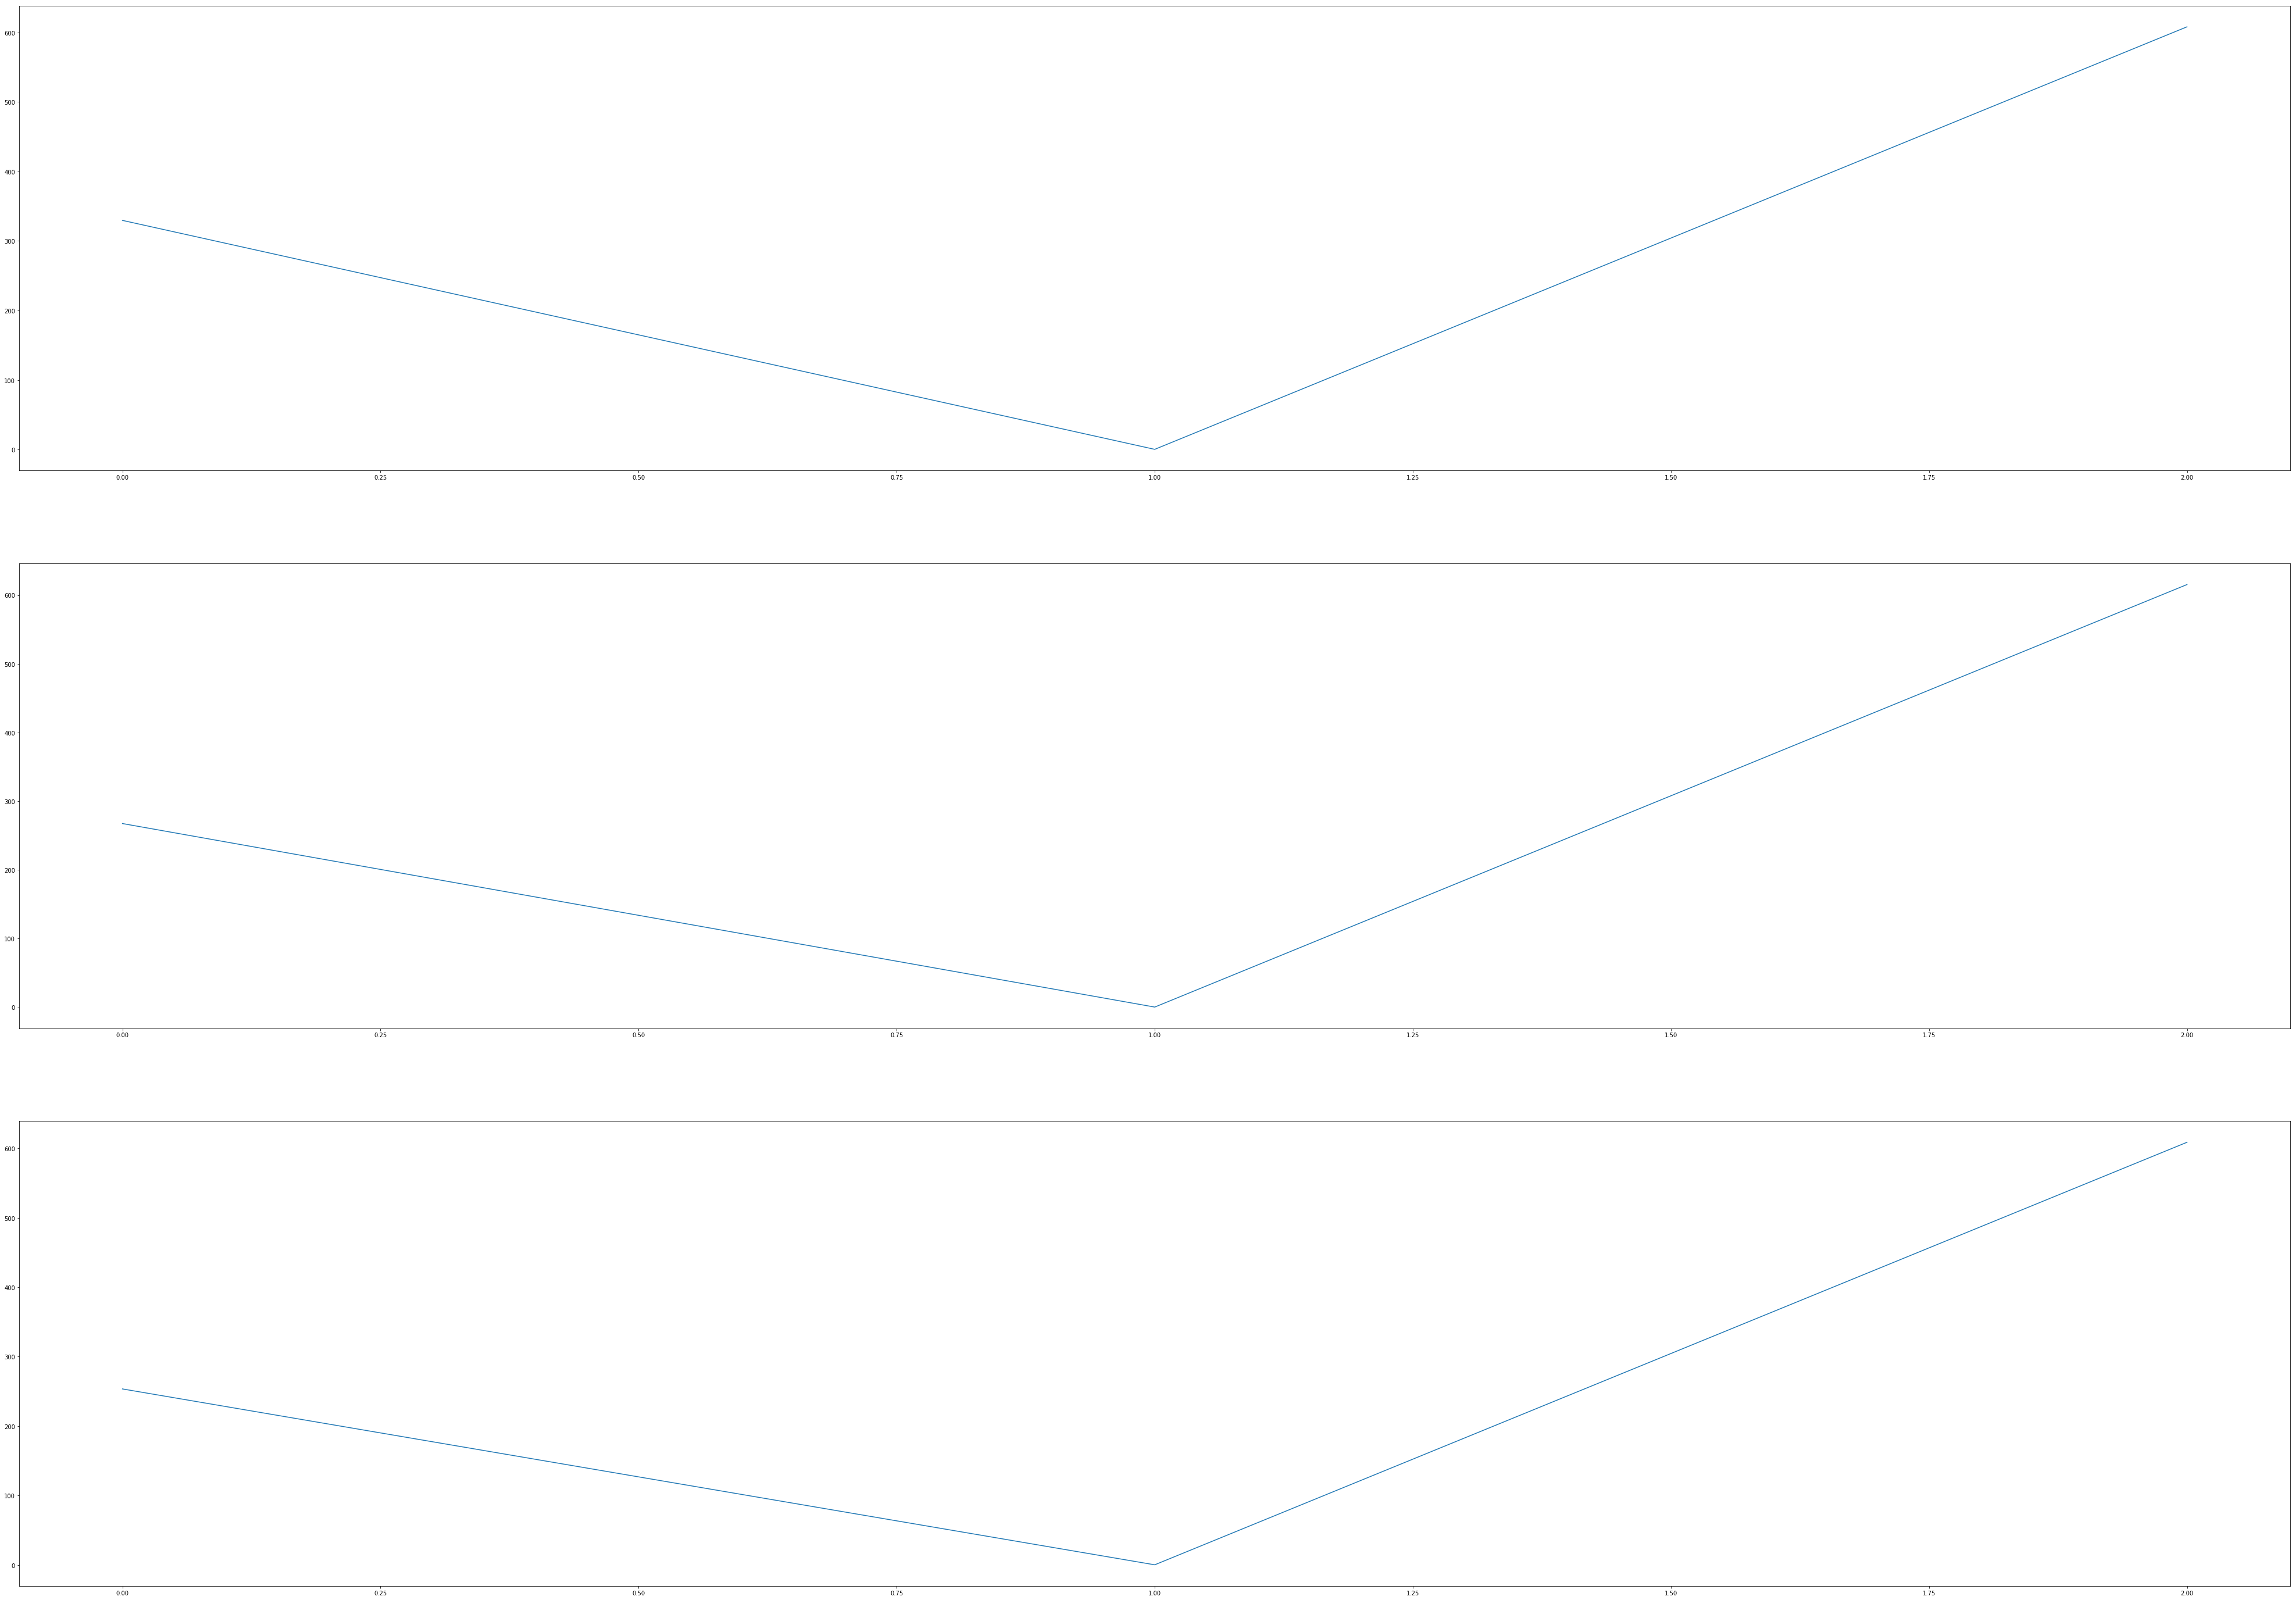

In [13]:
groups = [0,1,2]
i = 1
# plot each column
plt.figure(figsize=(70,50))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(ninhat[group, 4:7])
	#plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [14]:
new = dataset

In [15]:
new.shape

(272, 8)

In [16]:
new.columns

Index(['Monthlyprod.Thp', 'Monthlyprod.Bean', 'Monthlyprod.Days',
       'Daily Gas prod. Mscfd', 'GOR STB/SCF', 'WCUT Fraction',
       'Daily Prod. Oil', 'Water daily '],
      dtype='object')

In [17]:
new.index

Index(['01/05/92', '01/06/92', '01/07/92', '01/08/92', '01/09/92', '01/10/92',
       '01/11/92', '01/12/92', '01/01/93', '01/02/93',
       ...
       '01/03/14', '01/04/14', '01/05/14', '01/06/14', '01/07/14', '01/08/14',
       '01/09/14', '01/10/14', '01/11/14', '01/12/14'],
      dtype='object', name='Date', length=272)

In [18]:
nin=new.index[-1]
print(nin)

01/12/14


In [19]:
newxhat= pd.DataFrame(ninhat,columns=[c for c in new.columns] )

In [20]:
newxhat.shape

(24, 8)

In [21]:
new=new.append(newxhat)
new.shape

(296, 8)

In [22]:
new.head(4)

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
01/05/92,900.0,14.0,25.8,135.348837,411.258980,0.0,329.108527,0.0
01/06/92,750.0,14.0,29.9,150.735786,450.024963,0.0,334.949833,0.0
01/07/92,750.0,14.0,30.2,149.602649,451.258490,0.0,331.523179,0.0
01/08/92,1500.0,21.0,31.0,323.709677,398.736441,0.0,811.838710,0.0


In [24]:
newbori = new.to_csv('newbori4c.csv')